# The Amazing Orbital Intelligence Pony Identifier
This is a project to try and get a grip on how pytorch/torch works. Here's hoping for the best!

First, some basic imports. Specifically the `array` type from numpy, since that is a convenient way to represent the data we'll work with.

In [8]:
from numpy import array
import numpy.typing as npt
from typing import Literal
from math import floor

Next, setup. We're borrowing some pre-set values from [an existing repository](https://github.com/Lightning-AI/dl-fundamentals/blob/main/unit01-ml-intro/exercises/solutions/unit01_excercise_1/solution_ex1_early-stop.ipynb) here.



In [9]:
dataset = array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

true_values = array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

class BasicPerceptron:
    def __init__(self, w_count:int):
        self.number_of_weigths:int = w_count
        self.weights:list[float] = [0.0] * w_count
        self.bias:float = 0.0
    
    def update(self,data:tuple[float,float],label:Literal[1,0]) -> float:
        assert len(data) == len(self.weights)

        model_result:float = self.forward(data)
        
        error:float = float(label) - model_result
        self.bias += error

        for index in range(len(self.weights)):
            self.weights[index] += (error * data[index]) #??
        
        return error
    
    def forward(self, input_data:array) -> Literal[1,0]:
        assert len(input_data) == len(self.weights)

        weighted_sum = self.bias
        for weight, in_val in zip(self.weights,input_data):
            weighted_sum += weight * in_val
        if weighted_sum > 0:
            return 1
        return 0
    
    def assess_accuracy(self,inputs:array,expected:array):
        assert len(inputs) == len(expected)
        result = float(0.0)
        for sample,exp in zip(inputs,expected):
            prediction = self.forward(sample)
            #Fun fact: int(True) == 1
            result += int(prediction == exp)
        return float(result) / float(len(inputs))
    
    def get_dividing_line(self) -> tuple[float,float]:
        x_intercept = (-1 * self.bias) / self.weights[1]
        y_intercept = (-1 * self.bias) / self.weights[0]
        return (x_intercept,y_intercept)
    
def init_perceptron(epochs:int, w_count:int, update_weights:array, update_labels:array) -> tuple[BasicPerceptron,list[tuple[float,float]]]:
    assert len(update_weights) == len(update_labels)
    assert all(len(data) == w_count for data in update_weights)
    perceptron = BasicPerceptron(w_count)
    step_lines = list()

    for epoch in range(epochs):
        absolute_err:float = 0.0
        for data,label in zip(update_weights,update_labels):
            absolute_err += abs(perceptron.update(data,label))
        step_lines.append(perceptron.get_dividing_line())
        print(f"Epoch {epoch+1}: e {floor(absolute_err)}")
        if not bool(absolute_err):
            print("Error is zero, ending now.")
            break

    return perceptron, step_lines



Now that everything is set up and initialized, run the actual perceptron.


In [10]:
my_perceptron,lines = init_perceptron(5,2,dataset,true_values)

x = [1.1,2.1]
print(f"{x} -> {my_perceptron.forward(x)}")
print(f"Model accuracy: {my_perceptron.assess_accuracy(dataset,true_values) * 100}%")

Epoch 1: e 1
Epoch 2: e 3
Epoch 3: e 1
Epoch 4: e 0
Error is zero, ending now.
[1.1, 2.1] -> 1
Model accuracy: 100.0%


The perceptron works! So, next step: Make some pretty pictures!

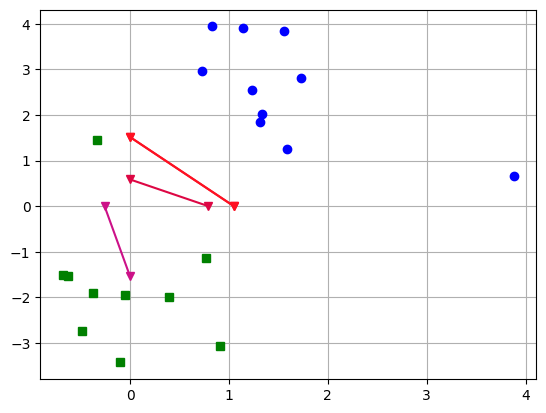

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# step 1: plot out the parts of the dataset that are in the 'false' category.
# dataset is the data-set, true_values says which items fall in which category.
false_category =  dataset[true_values == 0]
plt.plot(false_category[:,0],false_category[:,1], color='green', marker='s', linestyle='')

# step 2: plot out the parts of the dataset that are in the 'true' category.
true_category = dataset[true_values == 1]
plt.plot(true_category[:,0], true_category[:,1], color='blue', marker='o', linestyle='')

# step 3: plot what the perceptron arrived at. Out of curiosity
colors = ['#cc1188', '#dd0744', '#ee2233', '#ff1122']

for color,coords in zip(colors,lines):
    plt.plot([0,coords[1]],[coords[0],0],color=color,marker='v',linestyle='-')

# step 4: add axes
plt.grid(True)

#plt.plot([my_perceptron.bias],[my_perceptron.bias], color='red', marker='v', linestyle='')
